In [1]:
# célula de inicialização
%matplotlib inline                         
import numpy as np              # modulo numerico, essencial para trabalho cientifico
import pylab as pl   

Este notebook estuda o problema de colisões frontais inelásticas entre 3 partículas 1, 2, 3 de iguais massas e tenta investigar a seguinte questão:
 - Quantas colisões ocorrem até as partículas se separarem definitivamente, em função do coeficiente de restituição?

In [124]:
# Ver solução do problema na TP8
# matriz para colisão 12
#
def C12(e):
    return .5*np.array([[1-e,1+e,0],[1+e,1-e,0],[0,0,2]])
# matriz para colisão 23
#
def C23(e):
     return .5*np.array([[2,0,0],[0,1-e,1+e],[0,1+e,1-e]])
    

In [125]:
# velocidades iniciais
v0=np.array([1,0,0])

In [126]:
# primeira colisão 1-2
e=.5
v1 =np.dot(C12(.5),v0)
print(v1)

[0.25 0.75 0.  ]


In [127]:
# segunda colisão 1-3
v2=np.dot( C23(.5),v1)
print(v2)

[0.25   0.1875 0.5625]


In [128]:
# terceira colisão 1-2
v3=np.dot( C12(.5),v2)
print(v3)

[0.203125 0.234375 0.5625  ]


Agora procuramos uma maneira de representar sucessivamente os estados das partículas.

In [129]:
Nmax=100                      # máximo de colisões
v=np.zeros((3,Nmax),float)    # velocidades das 3 part.
#
#estado inicial
v[0,0]=1
i=0
e=.1
while v[0,i]>v[1,i]:    # v1>v2 para 1 e 2 colidirem
    v[:, i+1]=np.dot(C12(e),v[:,i])
    i+=1
    while v[1,i]>v[2,i]: # v2>v3 para 2 e 3 colidirem
        v[:,i+1]=np.dot(C23(e),v[:,i])
        i+=1 
print(i)
print()
print(v[:,i])
    

6

[0.33270906 0.33363155 0.33365939]


Text(0.5, 1.0, '$e=.1$')

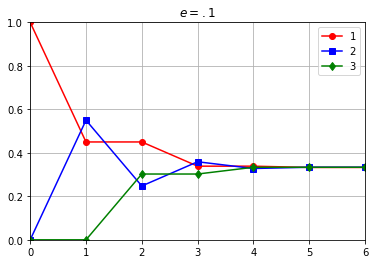

In [130]:
time=np.arange(0,100,1)
pl.plot(time,v[0,:],'r-o',time,v[1,:],'b-s',time,v[2,:],'g-d')
pl.grid('True')
pl.axis([0,6,0,1])
pl.legend(['1','2','3'])
pl.title(r'$e=.1$')


In [131]:
def Ncolisions(e):
    Nmax=100
    v=np.zeros((3,Nmax),float)
    v[0,0]=1
    i=0
    while v[0,i]>v[1,i]:
        v[:, i+1]=np.dot(C12(e),v[:,i])
        i+=1
        while v[1,i]>v[2,i]:
            v[:,i+1]=np.dot(C23(e),v[:,i])
            i+=1 
    return (i, v[:,i])


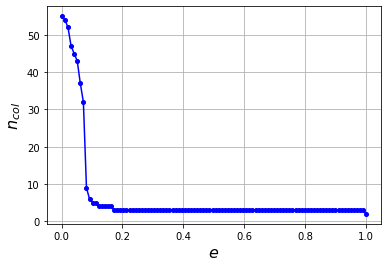

In [133]:
evals = np.linspace(0.001,1,100)
Nvals= np.zeros(100,float) 
for i in range(len(evals)):
    Nvals[i]=Ncolisions(evals[i])[0]
pl.plot(evals,Nvals,'b-o',ms=4)
pl.grid('True')
pl.xlabel(r'$e$', FontSize=16)
pl.ylabel(r'$n_{col}$', FontSize=16);

Note-se que estes programas dão um valor de $N$ para $e=10^{-5}$ menor do que para $e=10^{-4}$. Isto resulta possívelmente de erros de arreondamento porque as velocidades tendem muito rapidamente para valores quase iguais. 

In [134]:
Ncolisions(.0001)[0]

56

In [135]:
Ncolisions(.00001)[0]

54